In [59]:
import pandas as pd
from datasets import load_dataset
import torch
from sklearn.model_selection import train_test_split
import numpy as np
import os
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 2060'

In [22]:
dataset = load_dataset("owaiskha9654/PubMed_MultiLabel_Text_Classification_Dataset_MeSH")
dataset = dataset['train']
df = pd.DataFrame(dataset)


In [23]:
df.head()

,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,E,F,G,H,I,J,L,M,N,Z
0,Expression of p53 and coexistence of HPV in pr...,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",8549602,"[['D13.444.600.223.555', 'D27.505.259.750.600....","['Chemicals and Drugs [D]', 'Organisms [B]', '...",0,1,1,1,1,0,0,1,0,0,0,0,0,0
1,Vitamin D status in pregnant Indian women acro...,The present cross-sectional study was conducte...,"['Adult', 'Alkaline Phosphatase', 'Breast Feed...",21736816,"[['M01.060.116'], ['D08.811.277.352.650.035'],...","['Named Groups [M]', 'Chemicals and Drugs [D]'...",0,1,1,1,1,1,1,0,1,1,0,1,1,1
2,[Identification of a functionally important di...,The occurrence of individual amino acids and d...,"['Amino Acid Sequence', 'Analgesics, Opioid', ...",19060934,"[['G02.111.570.060', 'L01.453.245.667.060'], [...","['Phenomena and Processes [G]', 'Information S...",1,1,0,1,1,0,1,0,0,0,1,0,0,0
3,Multilayer capsules: a promising microencapsul...,"In 1980, Lim and Sun introduced a microcapsule...","['Acrylic Resins', 'Alginates', 'Animals', 'Bi...",11426874,"[['D05.750.716.822.111', 'D25.720.716.822.111'...","['Chemicals and Drugs [D]', 'Technology, Indus...",1,1,1,1,1,0,1,0,0,1,0,0,0,0
4,"Nanohydrogel with N,N'-bis(acryloyl)cystine cr...",Substantially improved hydrogel particles base...,"['Antineoplastic Agents', 'Cell Proliferation'...",28323099,"[['D27.505.954.248'], ['G04.161.750', 'G07.345...","['Chemicals and Drugs [D]', 'Phenomena and Pro...",1,1,0,1,1,0,1,0,0,1,0,0,0,0


In [24]:
print('Average Article length: ', df.abstractText.str.split().str.len().mean())
print('Stdev Article length: ', df.abstractText.str.split().str.len().std())
cols = df.columns
cols = list(df.columns)
mesh_Heading_categories = cols[6:]
num_labels = len(mesh_Heading_categories)
print('Mesh Labels Root Class: "\n"',mesh_Heading_categories)
print("\n")
print('Number of Labels: ' ,num_labels)
counts = []
for mesh_Heading_category in mesh_Heading_categories:
    counts.append((mesh_Heading_category, df[mesh_Heading_category].sum()))
df_count = pd.DataFrame(counts, columns=['Root Label', 'number of Abstract'])
df_count

Average Article length:  192.05284
Stdev Article length:  76.74764082329723
Mesh Labels Root Class: "
" ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'Z']


Number of Labels:  14


,Root Label,number of Abstract
0,A,23263
1,B,46577
2,C,26453
3,D,31074
4,E,39202
5,F,8885
6,G,33609
7,H,6069
8,I,5595
9,J,5531


In [25]:
df_train, df_test = train_test_split(df, random_state=17, test_size=0.20, shuffle=True)

print(df_train.shape)
print(df_test.shape)

df_train['one_hot_labels'] = list(df_train[mesh_Heading_categories].values)

labels = list(df_train.one_hot_labels.values)
Article_train = list(df_train.abstractText.values)

df_train.head(3)

(40000, 20)
(10000, 20)


,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,...,F,G,H,I,J,L,M,N,Z,one_hot_labels
2380,"Mortality among residents of Uravan, Colorado ...",A cohort mortality study was conducted of all ...,"['Adult', 'Causality', 'Cohort Studies', 'Colo...",17768330,"[['M01.060.116'], ['N05.715.350.200', 'N06.850...","['Named Groups [M]', 'Health Care [N]', 'Analy...",0,1,1,1,...,0,0,0,1,1,0,1,1,1,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]"
3385,High frequency of inactivation of the imprinte...,"Embryonal tumors such as Wilms' tumor (WT), em...","['Child', 'Child, Preschool', 'DNA Methylation...",10404060,"[['M01.060.406'], ['M01.060.406.448'], ['G02.1...","['Named Groups [M]', 'Phenomena and Processes ...",0,1,1,1,...,0,1,0,0,0,0,1,0,0,"[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]"
41779,Short-term clinical outcomes after HLA 1-locus...,"In Japan, use of unrelated peripheral blood st...","['Acute Disease', 'Adolescent', 'Adult', 'Aged...",30877606,"[['C23.550.291.125'], ['M01.060.057'], ['M01.0...","['Diseases [C]', 'Named Groups [M]', 'Phenomen...",1,1,1,1,...,0,1,0,0,0,0,1,1,0,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]"


In [29]:
from transformers import XLNetForSequenceClassification, XLNetTokenizer,BertForSequenceClassification,BertTokenizer, RobertaForSequenceClassification,RobertaTokenizer

max_length = 128
tokenizer = RobertaTokenizer.from_pretrained('distilroberta-base', do_lower_case=False)  # tokenizer
# tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.2', do_lower_case=True) 
#tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=False) 

encodings = tokenizer.batch_encode_plus(Article_train,max_length=max_length,padding=True,truncation=True) # tokenizer's encoding method
print('tokenizer outputs: ', encodings.keys())

input_ids = encodings['input_ids'] # tokenized and encoded sentences
attention_masks = encodings['attention_mask'] # attention masks

tokenizer outputs:  dict_keys(['input_ids', 'attention_mask'])


In [ ]:
# Identifying indices of 'one_hot_labels' entries that only occur once - this will allow me to stratify split our training data later
label_counts = df_train.one_hot_labels.astype(str).value_counts()
one_freq = label_counts[label_counts==1].keys()
one_freq_idxs = sorted(list(df_train[df_train.one_hot_labels.astype(str).isin(one_freq)].index), reverse=True)
# print('df label indices with only one instance: ', one_freq_idxs)

In [30]:
train_inputs, validation_inputs, train_labels, validation_labels, train_masks, validation_masks = train_test_split(input_ids, labels, attention_masks,
                                                            random_state=17, test_size=0.20)

# Convert all of our data into torch tensors, the required datatype for our BERT Pytorch model
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)

validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)

C:\Users\georg\AppData\Local\Temp\ipykernel_17880\84244288.py:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:264.)
  train_labels = torch.tensor(train_labels)


In [42]:
batch_size = 64
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels,)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)
torch.save(validation_dataloader,'validation_data_loader')
torch.save(train_dataloader,'train_data_loader')

In [43]:
model = RobertaForSequenceClassification.from_pretrained('distilroberta-base', num_labels=num_labels)
# model = BertForSequenceClassification.from_pretrained("dmis-lab/biobert-base-cased-v1.2", num_labels=num_labels)
# model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=num_labels)
model.cuda()
print('Model Pushed to Cuda for Training')

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias',

Model Pushed to Cuda for Training


In [44]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]
from torch.optim import AdamW
optimizer = AdamW(optimizer_grouped_parameters,lr=6e-6)
# optimizer = AdamW(model.parameters(),lr=4e-5)  # Default optimization #XL-NET
os.environ['TF_FORCE_GPU_ALLOW_GROWTH']='true'

In [48]:
%%time
from tqdm import trange
from torch.nn import BCEWithLogitsLoss, BCELoss
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, f1_score, accuracy_score

# For Storing our loss and accuracy for plotting
train_loss_set = []
val_f1_accuracy_list,val_flat_accuracy_list,training_loss_list,epochs_list=[],[],[],[]

# Number of training epochs (recommend between 5 and 10)
epochs = 6

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch "):
    # Training

    # Set our model to training mode (as opposed to evaluation mode)
    model.train()
    print(model.device)
    # Tracking variables
    tr_loss = 0 #running loss
    nb_tr_examples, nb_tr_steps = 0, 0
  
    # Train the data for one epoch
    for step, batch in enumerate(train_dataloader):
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()

        # Forward pass for multilabel classification
        # https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html
        # https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html
        # Creates a criterion that measures the Binary Cross Entropy between the target and the input probabilities
        # Also This loss combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable 
        # than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the 
        # log-sum-exp trick for numerical stability.
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs[0]
        loss_func = BCEWithLogitsLoss()  
        loss = loss_func(logits.view(-1,num_labels),b_labels.type_as(logits).view(-1,num_labels)) #convert labels to float for calculation
        
        train_loss_set.append(loss.item())    

        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # scheduler.step()
        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    print("Train loss: {}".format(tr_loss/nb_tr_steps))
    training_loss_list.append(tr_loss/nb_tr_steps)

    ###############################################################################

    # Validation

    # Put model in evaluation mode to evaluate loss on the validation set
    model.eval()

    # Variables to gather full output
    logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

    # Predict
    for i, batch in enumerate(validation_dataloader):
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
            # Forward pass
            outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
            b_logit_pred = outs[0]
            pred_label = torch.sigmoid(b_logit_pred)

        b_logit_pred = b_logit_pred.detach().cpu().numpy()
        pred_label = pred_label.to('cpu').numpy()
        b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

    # Flatten outputs
    pred_labels = [item for sublist in pred_labels for item in sublist]
    true_labels = [item for sublist in true_labels for item in sublist]

    # Calculate Accuracy
    threshold = 0.50
    pred_bools = [pl>threshold for pl in pred_labels]
    true_bools = [tl==1 for tl in true_labels]
    val_f1_accuracy = f1_score(true_bools,pred_bools,average='micro')*100
    val_flat_accuracy = accuracy_score(true_bools, pred_bools)*100

    print('F1 Validation Accuracy: ', val_f1_accuracy)  
    print('Flat Validation Accuracy: ', val_flat_accuracy)
    print('\n')
    val_f1_accuracy_list.append(val_f1_accuracy)
    val_flat_accuracy_list.append(val_flat_accuracy)
    epochs_list.append(epochs)  
    
    print("train_loss", tr_loss/nb_tr_steps,"val_f1_accuracy", val_f1_accuracy,"val_flat_accuracy", val_flat_accuracy)


Epoch :   0%|          | 0/6 [00:00<?, ?it/s]

cuda:0
Train loss: 0.37973081463575364


Epoch :  17%|█▋        | 1/6 [1:16:15<6:21:16, 4575.24s/it]

F1 Validation Accuracy:  81.17154811715481
Flat Validation Accuracy:  9.375


train_loss 0.37973081463575364 val_f1_accuracy 81.17154811715481 val_flat_accuracy 9.375
cuda:0
Train loss: 0.33233627837896346


Epoch :  33%|███▎      | 2/6 [2:05:35<4:01:41, 3625.49s/it]

F1 Validation Accuracy:  81.46067415730337
Flat Validation Accuracy:  14.0625


train_loss 0.33233627837896346 val_f1_accuracy 81.46067415730337 val_flat_accuracy 14.0625
cuda:0
Train loss: 0.31424267506599424


Epoch :  50%|█████     | 3/6 [3:00:30<2:53:43, 3474.53s/it]

F1 Validation Accuracy:  82.9817158931083
Flat Validation Accuracy:  15.625


train_loss 0.31424267506599424 val_f1_accuracy 82.9817158931083 val_flat_accuracy 15.625
cuda:0
Train loss: 0.3034516060352325


Epoch :  67%|██████▋   | 4/6 [3:52:47<1:51:22, 3341.09s/it]

F1 Validation Accuracy:  83.49788434414668
Flat Validation Accuracy:  15.625


train_loss 0.3034516060352325 val_f1_accuracy 83.49788434414668 val_flat_accuracy 15.625
cuda:0
Train loss: 0.29469546088576315


Epoch :  83%|████████▎ | 5/6 [4:43:36<53:55, 3235.76s/it]  

F1 Validation Accuracy:  84.35374149659863
Flat Validation Accuracy:  15.625


train_loss 0.29469546088576315 val_f1_accuracy 84.35374149659863 val_flat_accuracy 15.625
cuda:0
Train loss: 0.28738275146484377


Epoch : 100%|██████████| 6/6 [5:39:29<00:00, 3394.94s/it]

F1 Validation Accuracy:  84.9655172413793
Flat Validation Accuracy:  17.1875


train_loss 0.28738275146484377 val_f1_accuracy 84.9655172413793 val_flat_accuracy 17.1875
CPU times: total: 1h 23min 27s
Wall time: 5h 39min 29s


In [53]:
output_dir = "C:/Users/georg/Desktop/modelsss/roberta_pretrained_6epochs"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Optionally, save other configurations or metadata
# For example, you can save the model configuration
model.config.save_pretrained(output_dir)

In [54]:
from huggingface_hub import notebook_login
notebook_login()

In [76]:
#Converting Labels to categorical before pushing it to Hugging Face Hub
model.config.label2id= {
"Anatomy [A]": 0,
"Organisms [B]": 1,
"Diseases [C]": 2,
"Chemicals and Drugs [D]": 3,
"Analytical, Diagnostic and Therapeutic Techniques, and Equipment [E]": 4,
"Psychiatry and Psychology [F]": 5,
"Phenomena and Processes [G]": 6,
"Disciplines and Occupations [H]": 7,
"Anthropology, Education, Sociology, and Social Phenomena [I]": 8,
"Technology, Industry, and Agriculture [J]": 9,
"Information Science [L]": 10,
"Named Groups [M]": 11,
"Health Care [N]": 12,
"Geographicals [Z]": 13,
}


model.config.id2label={
    "0": "Anatomy [A]",
    "1": "Organisms [B]",
    "2": "Diseases [C]",
    "3": "Chemicals and Drugs [D]",
    "4": "Analytical, Diagnostic and Therapeutic Techniques, and Equipment [E]",
    "5": "Psychiatry and Psychology [F]",
    "6": "Phenomena and Processes [G]",
    "7": "Disciplines and Occupations [H]",
    "8": "Anthropology, Education, Sociology, and Social Phenomena [I]",
    "9": "Technology, Industry, and Agriculture [J]",
    "10": "Information Science [L]",
    "11": "Named Groups [M]",
    "12": "Health Care [N]",
    "13": "Geographicals [Z]"
}
model.push_to_hub("SuiGio/roberta_pubmesh")
tokenizer.push_to_hub("SuiGio/roberta_pubmesh")

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/SuiGio/roberta_pubmesh/commit/21c91c815e53f0931f8bd3d4ea8b127069b1b65b', commit_message='Upload tokenizer', commit_description='', oid='21c91c815e53f0931f8bd3d4ea8b127069b1b65b', pr_url=None, pr_revision=None, pr_num=None)

In [75]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("SuiGio/roberta_pubmesh")
model = AutoModelForSequenceClassification.from_pretrained("SuiGio/roberta_pubmesh")

Text(0.5, 1.0, 'Training Loss vs Number of Epochs for RoBerta base')

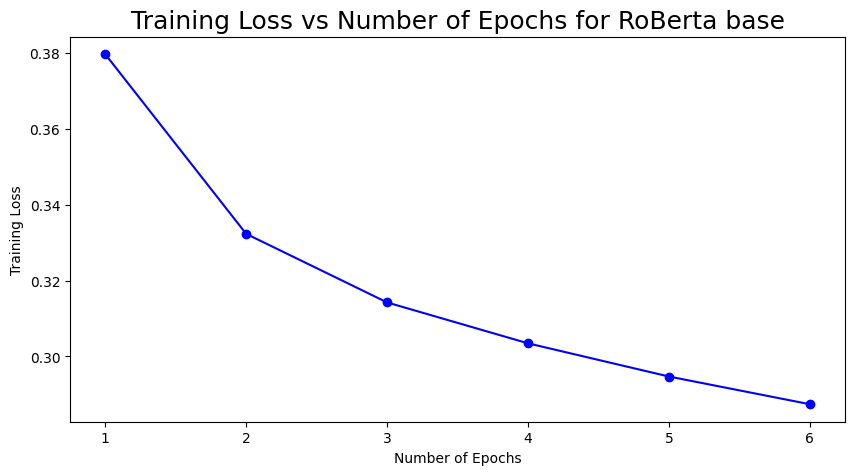

In [63]:
import matplotlib.pyplot as plt
training_loss_list =  [0.37973081463575364,
 0.33233627837896346,
 0.31424267506599424,
0.3034516060352325,
 0.29469546088576315,
 0.28738275146484377]
num_epochs = np.arange(1,len(training_loss_list)+1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(num_epochs, np.array(training_loss_list) ,'bo-',label="Train Loss")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Training Loss")
ax.set_title("Training Loss vs Number of Epochs for RoBerta base",fontsize=18)

(0.0, 100.0)

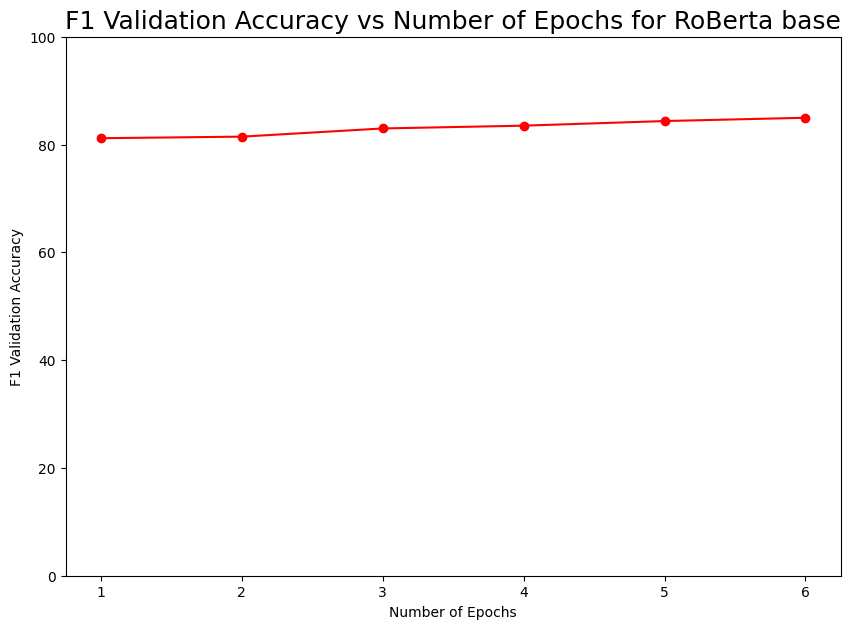

In [64]:
fig, ax = plt.subplots(figsize=(10, 7))
val_f1_accuracy_list = [81.17154811715481,
 81.46067415730337,
 82.9817158931083,
 83.49788434414668,
84.35374149659863,
84.9655172413793]
ax.plot(num_epochs, np.array(val_f1_accuracy_list),'ro-' ,label="F1 Validation Accuracy")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("F1 Validation Accuracy")
ax.set_title("F1 Validation Accuracy vs Number of Epochs for RoBerta base",fontsize=18)
ax.set_ylim(0, 100)

(0.0, 100.0)

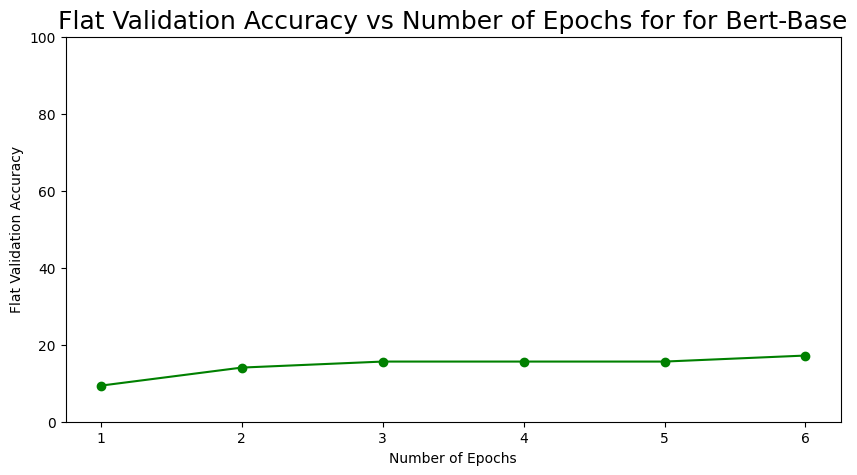

In [65]:
val_flat_accuracy_list = [9.375,
14.0625,
15.625,
15.625,
15.625,
17.1875]
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(num_epochs, np.array(val_flat_accuracy_list),'go-', label="Flat Validation Accuracy")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Flat Validation Accuracy")
ax.set_title("Flat Validation Accuracy vs Number of Epochs for for Bert-Base",fontsize=18)
ax.set_ylim(0, 100)

In [81]:
df_test['one_hot_labels'] = list(df_test[mesh_Heading_categories].values)
df_test.head(3)

KeyError: "None of [Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'Z'], dtype='object')] are in the [columns]"

: 

In [69]:
test_labels = list(df_test.one_hot_labels.values)
Articles_test = list(df_test.abstractText.values)
test_mesh_categories = list(df_test.columns[6:20])

# Encoding input data
test_encodings = tokenizer.batch_encode_plus(Articles_test,max_length=max_length,padding=True,truncation=True)
test_input_ids = test_encodings['input_ids']
test_attention_masks = test_encodings['attention_mask']

# Make tensors out of data
test_inputs = torch.tensor(test_input_ids)
test_labels = torch.tensor(test_labels)
test_masks = torch.tensor(test_attention_masks)
# Create test dataloader
test_data = TensorDataset(test_inputs, test_masks, test_labels,)# test_token_types)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)
# Save test dataloader
torch.save(test_dataloader,'test_data_loader')

In [71]:
%%time

# Test
model.cuda()
# Put model in evaluation mode to evaluate loss on the validation set
model.eval()

#track variables
logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

# Predict
for i, batch in enumerate(test_dataloader):
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels, = batch
    with torch.no_grad():
        # Forward pass
        outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        b_logit_pred = outs[0]
        pred_label = torch.sigmoid(b_logit_pred)

        b_logit_pred = b_logit_pred.detach().cpu().numpy()
        pred_label = pred_label.to('cpu').numpy()
        b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

# Flatten outputs
tokenized_texts = [item for sublist in tokenized_texts for item in sublist]
pred_labels = [item for sublist in pred_labels for item in sublist]
true_labels = [item for sublist in true_labels for item in sublist]
# Converting flattened binary values to boolean values
true_bools = [tl==1 for tl in true_labels]

CPU times: total: 10.6 s
Wall time: 39.8 s


In [72]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, f1_score, accuracy_score
pred_bools = [pl>0.50 for pl in pred_labels] #boolean output after thresholding
# Print and save classification report
Test_F1_Accuracy=f1_score(true_bools, pred_bools,average='micro')
Test_Flat_Accuracy= accuracy_score(true_bools, pred_bools)
print('Test F1 Accuracy: ',Test_F1_Accuracy )
print('Test Flat Accuracy: ',Test_Flat_Accuracy,'\n')

df_test=pd.DataFrame({'Test F1 Accuracy':Test_F1_Accuracy, 'Test Flat Accuracy':Test_Flat_Accuracy},index=[0])

print(classification_report(true_bools,pred_bools,target_names=test_mesh_categories))
clf_report = classification_report(true_bools,pred_bools,target_names=test_mesh_categories,output_dict=True)
df_report=pd.DataFrame(clf_report).transpose()

Test F1 Accuracy:  0.8467497414865838
Test Flat Accuracy:  0.1586 

              precision    recall  f1-score   support

           A       0.77      0.81      0.79      4665
           B       0.97      0.99      0.98      9349
           C       0.86      0.88      0.87      5273
           D       0.91      0.92      0.92      6197
           E       0.82      0.95      0.88      7823
           F       0.81      0.73      0.77      1745
           G       0.83      0.89      0.86      6655
           H       0.54      0.09      0.16      1302
           I       0.69      0.57      0.62      1089
           J       0.72      0.40      0.51      1069
           L       0.73      0.38      0.50      1537
           M       0.83      0.93      0.88      4205
           N       0.81      0.77      0.79      4595
           Z       0.78      0.71      0.74      1617

   micro avg       0.85      0.85      0.85     57121
   macro avg       0.79      0.72      0.73     57121
weighted avg

c:\Users\georg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\georg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
df_report.to_csv('C:/Users/georg/Desktop/modelsss/Classification_Report.csv',index=False)